In [9]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/METEC Tests - Sheet3.csv')

X = pd.DataFrame(dataset.iloc[:,:2].values)
Y = pd.DataFrame(dataset.iloc[:,2:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

         0    1
0      186  204
1      186  204
2      185  203
3      186  204
4      186  204
...    ...  ...
30383  181  180
30384  179  180
30385  178  180
30386  180  179
30387  181  180

[30388 rows x 2 columns]
       0
0      0
1      0
2      0
3      0
4      0
...   ..
30383  0
30384  0
30385  0
30386  0
30387  0

[30388 rows x 1 columns]
(24310, 2)
(24310, 1)


In [10]:
from deepforest import CascadeForestClassifier
model = CascadeForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
from mondrianforest import MondrianForestClassifier

#using the Adaboost and CRF testing combination
estimator1 = AdaBoostClassifier(n_estimators = 100)
estimator2 = MondrianForestClassifier(n_tree = 1)

#load the different base layers into the model 
n_estimators = 2  # the number of base estimators per cascade layer
estimators = [AdaBoostClassifier(n_estimators= 10, random_state = 1), AdaBoostClassifier(n_estimators = 10, random_state=2), estimator2, estimator2]

model.set_estimator(estimators)

In [11]:
model.fit(X_train, Y_train)

[2025-03-22 21:46:08.907] Start to fit the model:
[2025-03-22 21:46:08.907] Fitting cascade layer = 0 


c:\Users\eddie\anaconda3\envs\ModifiedDFC\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\eddie\anaconda3\envs\ModifiedDFC\lib\site-packages\mondrianforest\classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


[2025-03-22 21:51:18.085] layer = 0  | Val Acc = 88.334 % | Elapsed = 309.177 s
[2025-03-22 21:51:18.111] Fitting cascade layer = 1 
[2025-03-22 21:55:03.303] layer = 1  | Val Acc = 88.885 % | Elapsed = 225.192 s
[2025-03-22 21:55:03.323] Fitting cascade layer = 2 
[2025-03-22 21:57:40.694] layer = 2  | Val Acc = 87.939 % | Elapsed = 157.371 s
[2025-03-22 21:57:40.694] Early stopping counter: 1 out of 2
[2025-03-22 21:57:40.743] Fitting cascade layer = 3 
[2025-03-22 21:59:57.277] layer = 3  | Val Acc = 88.622 % | Elapsed = 136.535 s
[2025-03-22 21:59:57.277] Early stopping counter: 2 out of 2
[2025-03-22 21:59:57.277] Handling early stopping
[2025-03-22 21:59:57.277] The optimal number of layers: 2


In [12]:
res = model.predict(X_test)
print(res)
# print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2025-03-22 21:59:57.296] Start to evalute the model:
[2025-03-22 21:59:57.298] Evaluating cascade layer = 0 


c:\Users\eddie\anaconda3\envs\ModifiedDFC\lib\site-packages\mondrianforest\classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


[2025-03-22 22:01:05.186] Evaluating cascade layer = 1 
[0 0 1 ... 1 0 0]
0.9170779861796644
              precision    recall  f1-score   support

           0   0.870637  1.000000  0.930845      3392
           1   1.000000  0.812360  0.896467      2686

    accuracy                       0.917078      6078
   macro avg   0.935318  0.906180  0.913656      6078
weighted avg   0.927805  0.917078  0.915653      6078



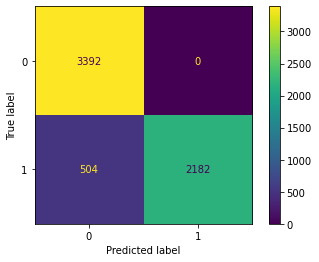

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()